### Import libraries
- Pandas to create dataframe and clean data
- Sqlite3 to create the sql database and run sql commands
- Numpy and matplotlib to create a bar graph

In [1]:
import sqlite3
import pandas as pd

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

- Load csv file into a dataframe using Pandas

In [2]:
df_original = pd.read_csv("BillboardHot100Singles.csv", encoding="ISO-8859-1")
df_original.head()

,Date,Year,Peak Chart Position,Artist - Source Database,Artist - Modified,Title - Source Database,Title - Modified,Duration,Original Record Label & Catalog No.,Suggested Filename,Concatenate,Eliminate Hyphens,Substitute Google Comma Char.,Eliminate Ampersand Phrases,Unnamed: 14,Unnamed: 15,Eliminate Parentheticals,Unnamed: 17,Search Formula
0,01/06/90,1990,1,Alannah Myles,Alannah Myles,Black Velvet,Black Velvet,4:45,Atlantic 88742,Alannah Myles--Black Velvet (1990),%22Alannah Myles%22+%22Black Velvet%22,%22Alannah Myles%22+%22Black Velvet%22,%22Alannah Myles%22+%22Black Velvet%22,NaN,NaN,%22Alannah Myles%22+%22Black Velvet%22,NaN,NaN,https://www.google.com/search?q=%22Alannah Myl...
1,01/06/90,1990,4,Milli Vanilli,Milli Vanilli,All Or Nothing,All or Nothing,3:56,Arista AS1-9923,Milli Vanilli--All or Nothing (1990),%22Milli Vanilli%22+%22All or Nothing%22,%22Milli Vanilli%22+%22All or Nothing%22,%22Milli Vanilli%22+%22All or Nothing%22,NaN,NaN,%22Milli Vanilli%22+%22All or Nothing%22,NaN,NaN,https://www.google.com/search?q=%22Milli Vanil...
2,01/06/90,1990,13,Michael Penn,Michael Penn,No Myth,No Myth,4:11,RCA 9111,Michael Penn--No Myth (1990),%22Michael Penn%22+%22No Myth%22,%22Michael Penn%22+%22No Myth%22,%22Michael Penn%22+%22No Myth%22,NaN,NaN,%22Michael Penn%22+%22No Myth%22,NaN,NaN,https://www.google.com/search?q=%22Michael Pen...
3,01/06/90,1990,20,Warrant,Warrant,Sometimes She Cries,Sometimes She Cries,4:06,Columbia 38-73300,Warrant--Sometimes She Cries (1990),%22Warrant%22+%22Sometimes She Cries%22,%22Warrant%22+%22Sometimes She Cries%22,%22Warrant%22+%22Sometimes She Cries%22,NaN,NaN,%22Warrant%22+%22Sometimes She Cries%22,NaN,NaN,https://www.google.com/search?q=%22Warrant%22+...
4,01/06/90,1990,56,Kenny G,Kenny G,Going Home,Going Home,5:26,Arista 9913,Kenny G--Going Home (1990),%22Kenny G%22+%22Going Home%22,%22Kenny G%22+%22Going Home%22,%22Kenny G%22+%22Going Home%22,NaN,NaN,%22Kenny G%22+%22Going Home%22,NaN,NaN,https://www.google.com/search?q=%22Kenny G%22+...


- Create a new dataframe that includes only the columns needed, then replace the origional dataframe with the new one

In [3]:
df_cleaned_data = df_original[['Date', 'Year', 'Peak Chart Position', 'Artist - Modified', 'Title - Modified']]
df_cleaned_data.head()

,Date,Year,Peak Chart Position,Artist - Modified,Title - Modified
0,01/06/90,1990,1,Alannah Myles,Black Velvet
1,01/06/90,1990,4,Milli Vanilli,All or Nothing
2,01/06/90,1990,13,Michael Penn,No Myth
3,01/06/90,1990,20,Warrant,Sometimes She Cries
4,01/06/90,1990,56,Kenny G,Going Home


- Rename columns to be more clear, and to make it easier to send to sql database

In [4]:
df_cleaned_data.columns = ['Date', 'Year', 'Chart_Position', 'Artist', 'Title']
df_cleaned_data.head()

,Date,Year,Chart_Position,Artist,Title
0,01/06/90,1990,1,Alannah Myles,Black Velvet
1,01/06/90,1990,4,Milli Vanilli,All or Nothing
2,01/06/90,1990,13,Michael Penn,No Myth
3,01/06/90,1990,20,Warrant,Sometimes She Cries
4,01/06/90,1990,56,Kenny G,Going Home


- Delete billboard table if it already exists (only necessary if the script has already been ran)
- Create sql database named billboard.db
- Create a table within billboard.db named billboard
- Load dataframe into sql billboard table

In [5]:
conn = sqlite3.connect('billboard.db')
conn.execute('''DROP TABLE IF EXISTS billboard''')

df_cleaned_data.to_sql('billboard', conn)

- Using sql to manipulate data
- Creates a new pandas dataframe from SQL Query to get artist frequency

In [6]:
query = "SELECT Artist, count(*) FROM billboard GROUP BY Artist ORDER BY COUNT(*) desc LIMIT 25"
df_Artist_Frequency = pd.read_sql(query, conn)
conn.close()
df_Artist_Frequency.columns = ['Artist', 'Frequency']
df_Artist_Frequency.head()

,Artist,Frequency
0,Madonna,24
1,Mariah Carey,20
2,Whitney Houston,17
3,Boyz II Men,16
4,Mary J. Blige,16


### Graph Data

#### Setup X and Y axis

- Pass variables to graph
- Set Range of graph

#### Graph Labels
- Label axis
- Rotate X labels

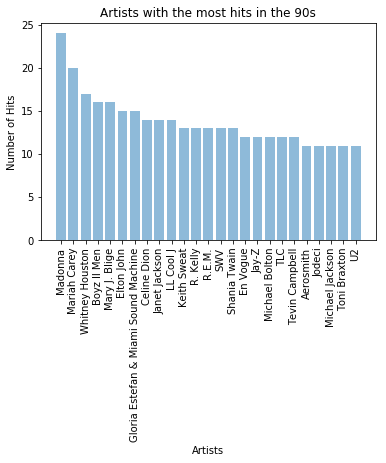

In [7]:
x_df = df_Artist_Frequency.Artist
y_df = df_Artist_Frequency.Frequency
y_pos = np.arange(len(y_df))

plt.bar(y_pos, y_df, align='center', alpha=0.5)
plt.xticks(y_pos, x_df)

plt.xticks(rotation=90)

plt.ylabel('Number of Hits')
plt.xlabel('Artists')
plt.title('Artists with the most hits in the 90s')

plt.show()